Workflow : Data collection -> EDA -> preprocess -> train test split -> ML model -> hyperparameter tuning -> model selection -> trained model -> prediction

In [ ]:
!pip install --upgrade scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 35.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.0
    Uninstalling scikit-learn-1.6.0:
      Successfully uninstalled scikit-learn-1.6.0


In [ ]:
#import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

In [ ]:
data = pd.read_csv("/content/train.csv") # reading data as pandas dataframe

In [ ]:
data.head() # understand structure of dataset

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [ ]:
data.shape

(800, 22)

In [ ]:
data.isnull().sum()

,0
ID,0
A1_Score,0
A2_Score,0
A3_Score,0
A4_Score,0
A5_Score,0
A6_Score,0
A7_Score,0
A8_Score,0
A9_Score,0


In [ ]:
# colums of data?
pd.set_option("display.max_columns",None)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [ ]:
#age column to int
data["age"]= data["age"].astype(int)

In [ ]:
data.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,1,7,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,0,23,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,0,43,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [ ]:
for col in data.columns:
  num_features = ["ID","age","result"]
  if col not in num_features:
    print(col, data[col].unique())
    print("-"*50)

A1_Score [1 0]
--------------------------------------------------
A2_Score [0 1]
--------------------------------------------------
A3_Score [1 0]
--------------------------------------------------
A4_Score [0 1]
--------------------------------------------------
A5_Score [1 0]
--------------------------------------------------
A6_Score [0 1]
--------------------------------------------------
A7_Score [1 0]
--------------------------------------------------
A8_Score [0 1]
--------------------------------------------------
A9_Score [1 0]
--------------------------------------------------
A10_Score [1 0]
--------------------------------------------------
gender ['f' 'm']
--------------------------------------------------
ethnicity ['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']
--------------------------------------------------
jaundice ['no' 'yes']
--------------------------------------------------
austim

In [ ]:
#drop columns that are not helpful
data = data.drop(columns=["ID","age_desc"])

In [ ]:
data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,Self,0
2,1,1,1,1,1,1,1,1,1,1,7,m,White-European,no,yes,United States,no,14.851484,Self,1
3,0,0,0,0,0,0,0,0,0,0,23,f,?,no,no,United States,no,2.276617,Self,0
4,0,0,0,0,0,0,0,0,0,0,43,m,?,no,no,South Africa,no,-4.777286,Self,0


In [ ]:
data["contry_of_res"].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Viet Nam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'AmericanSamoa', 'Bahamas', 'Saudi Arabia',
       'Ireland', 'Aruba', 'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan',
       'Armenia', 'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'Hong Kong',
       'Angola', 'China', 'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran',
       'Argentina', 'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone',
       'Czech Republic', 'Niger', 'Romania', 'Cyprus', 'Belgium',
       'Burundi', 'Bangladesh'], dtype=object)

In [ ]:
mapping={
    "Viet Nam" : "Vietnam",
    "AmericanSamoa" : "United States",
    "Hong Kong" : " China"
}

In [ ]:
data["contry_of_res"] = data["contry_of_res"].replace(mapping)

In [ ]:
data["contry_of_res"].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Vietnam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'Bahamas', 'Saudi Arabia', 'Ireland', 'Aruba',
       'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan', 'Armenia',
       'Serbia', 'Ethiopia', 'Sweden', 'Iceland', ' China', 'Angola',
       'China', 'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran',
       'Argentina', 'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone',
       'Czech Republic', 'Niger', 'Romania', 'Cyprus', 'Belgium',
       'Burundi', 'Bangladesh'], dtype=object)

In [ ]:
data["Class/ASD"].value_counts()

,count
Class/ASD,
0,639
1,161


In [ ]:
#eda
data.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [ ]:
data.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,27.963750,8.537303,0.201250
std,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.329827,4.807676,0.401185
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-6.137748,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,5.306575,0.000000
50%,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.000000,9.605299,0.000000
75%,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.250000,12.514484,0.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.000000,15.853126,1.000000


In [ ]:
sns.set_theme(style="darkgrid")

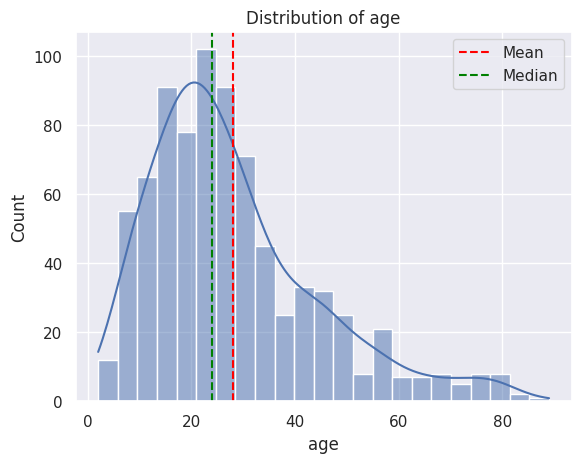

In [ ]:
# making histogram for age
sns.histplot(data["age"],kde=True)
plt.title("Distribution of age")

# cal mean age and median age
age_mean=data["age"].mean()
age_median = data["age"].median()

# differentiate mean and median with vertical lines
plt.axvline(age_mean,color="red",linestyle="--",label="Mean")
plt.axvline(age_median,color="green",linestyle="--",label="Median")
plt.legend()
plt.show()

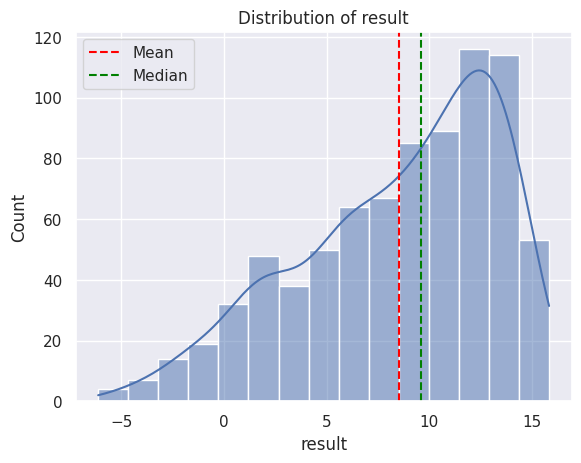

In [ ]:
# making histogram for result
sns.histplot(data["result"],kde=True)
plt.title("Distribution of result")

# cal mean result and median result
result_mean=data["result"].mean()
result_median = data["result"].median()

# differentiate mean and median with vertical lines
plt.axvline(result_mean,color="red",linestyle="--",label="Mean")
plt.axvline(result_median,color="green",linestyle="--",label="Median")
plt.legend()
plt.show()

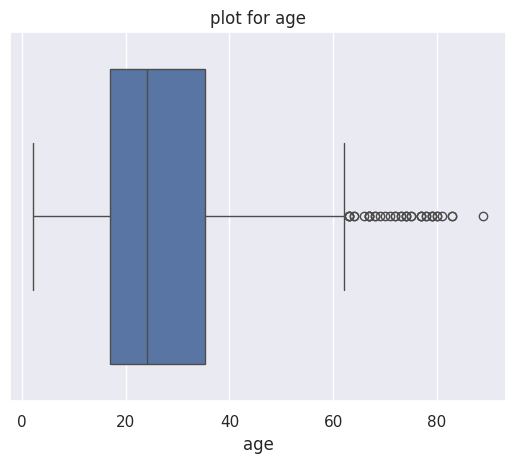

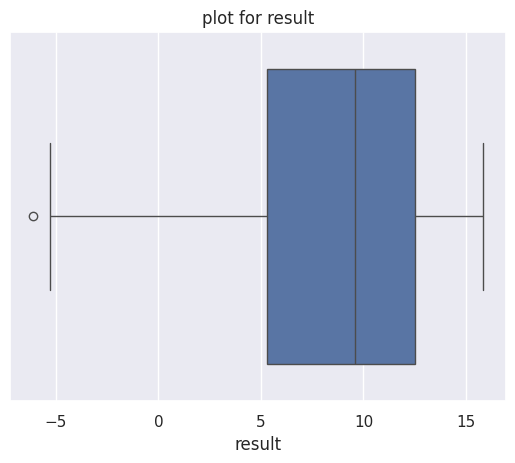

In [ ]:
# Identifying the outliers for numerical data
sns.boxplot(x=data["age"])
plt.title("plot for age")
plt.xlabel("age")
plt.show()
sns.boxplot(x=data["result"])
plt.title("plot for result")
plt.xlabel("result")

plt.show()

In [ ]:
#outliers numbers IQR method
Q1=data["age"].quantile(0.25)
Q3=data["age"].quantile(0.75)
IQR = Q3-Q1
lower_bound = Q1 - 1.5 *IQR
upper_bound = Q3 + 1.5 *IQR
age_outliers = data[(data["age"] < lower_bound) | ( data["age"] > upper_bound)]

In [ ]:
len(age_outliers)


39

In [ ]:
#outliers numbers IQR method
Q1=data["result"].quantile(0.25)
Q3=data["result"].quantile(0.75)
IQR = Q3-Q1
lower_bound = Q1 - 1.5 *IQR
upper_bound = Q3 + 1.5 *IQR
result_outliers = data[(data["result"] < lower_bound) | ( data["result"] > upper_bound)]

In [ ]:
len(result_outliers)

1

In [ ]:
#analysis of categorical features
data.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

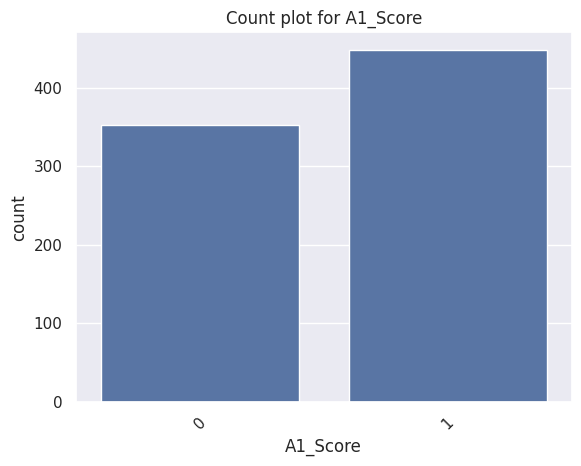

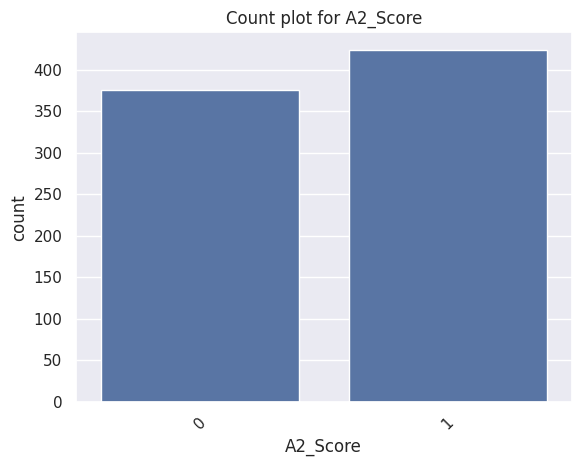

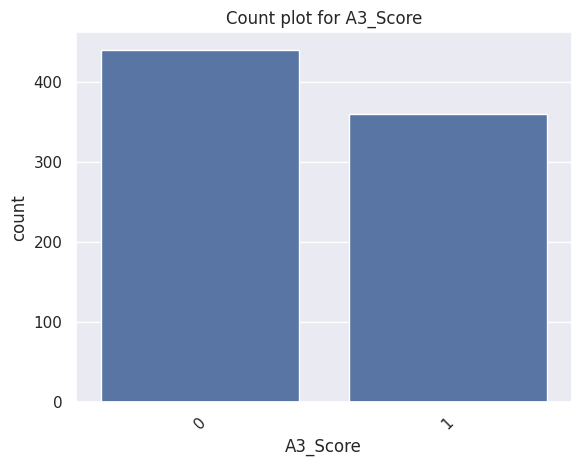

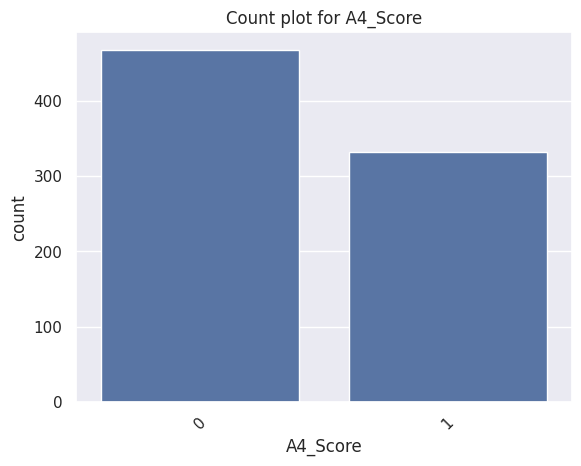

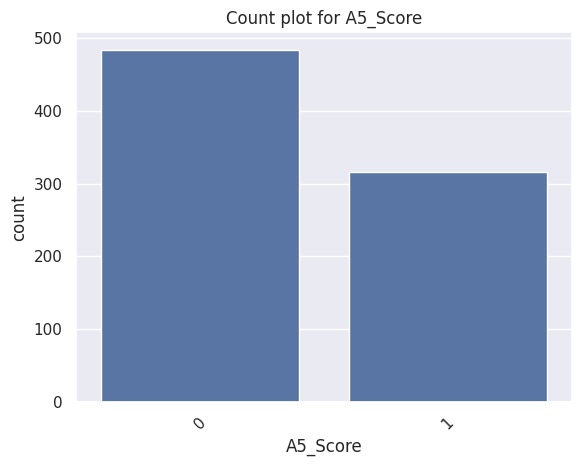

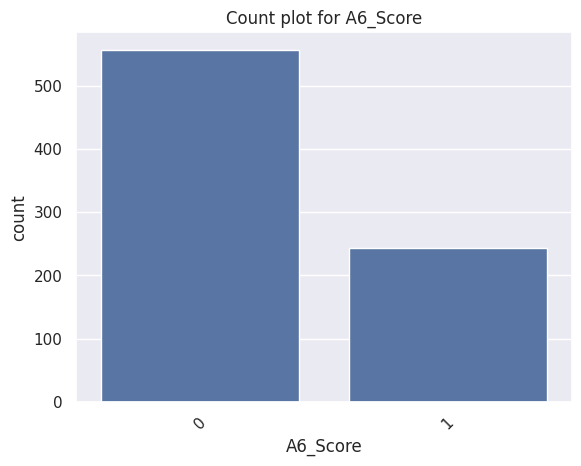

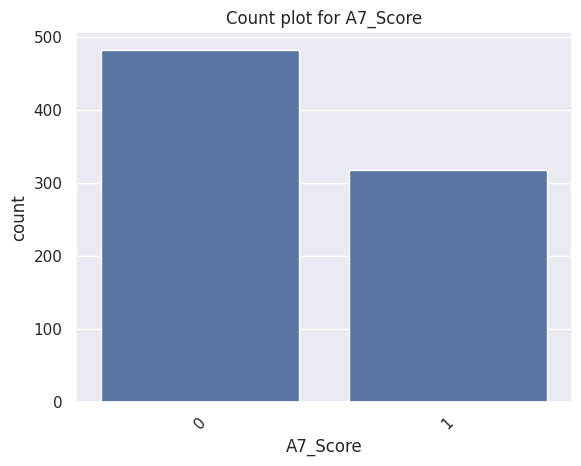

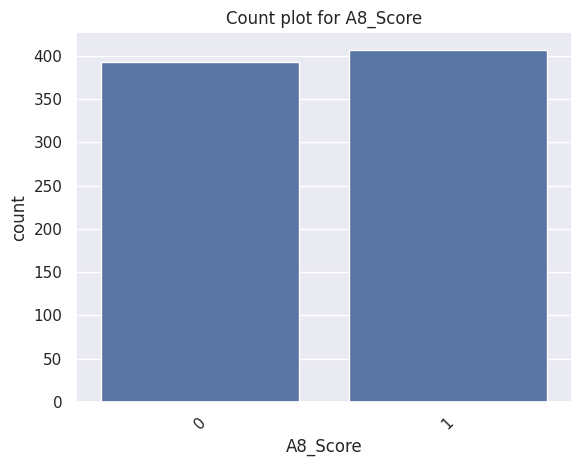

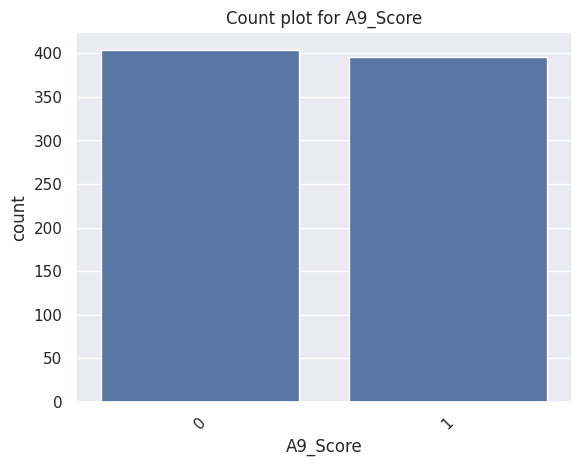

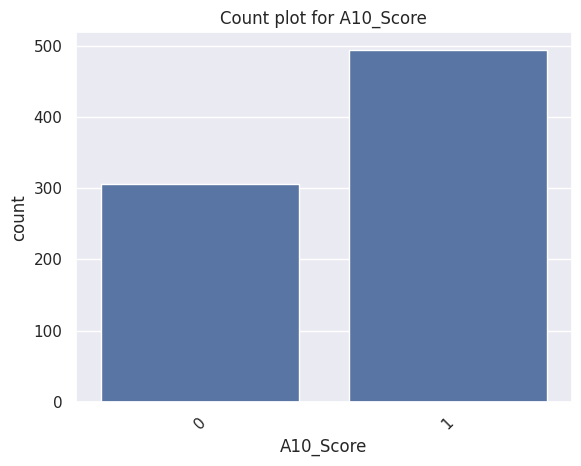

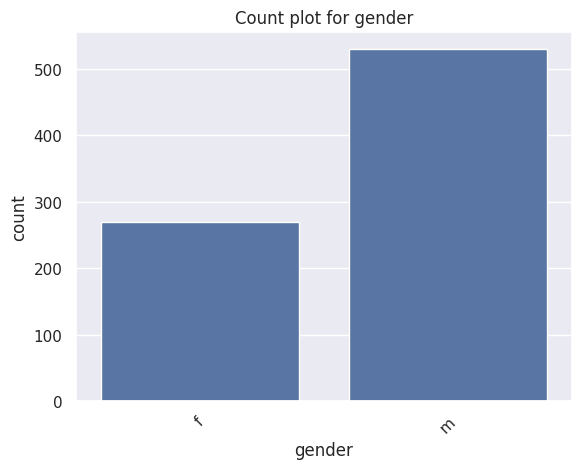

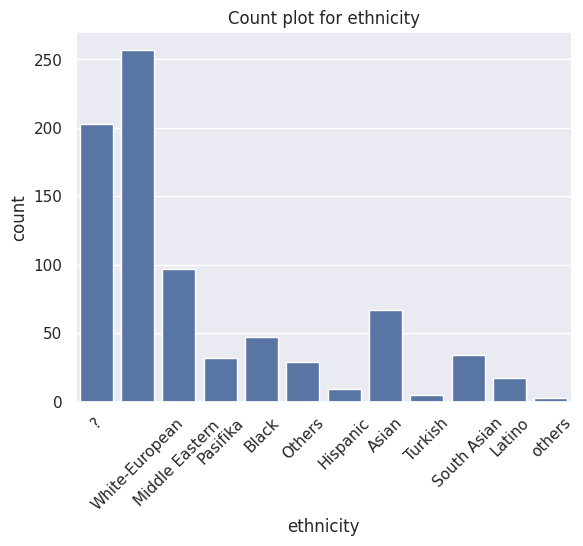

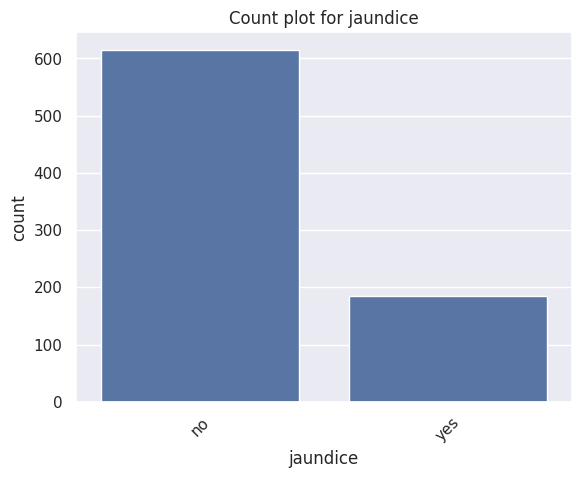

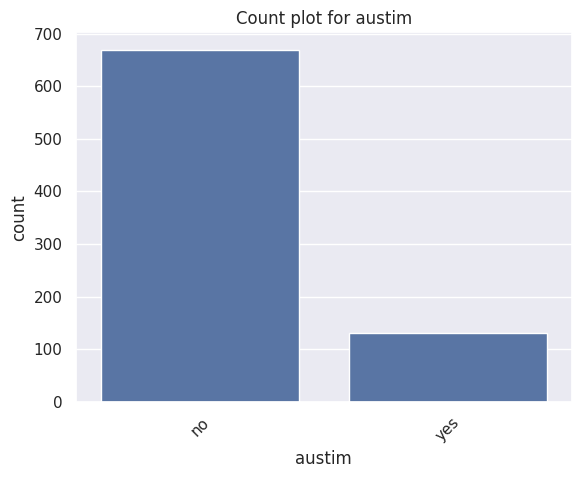

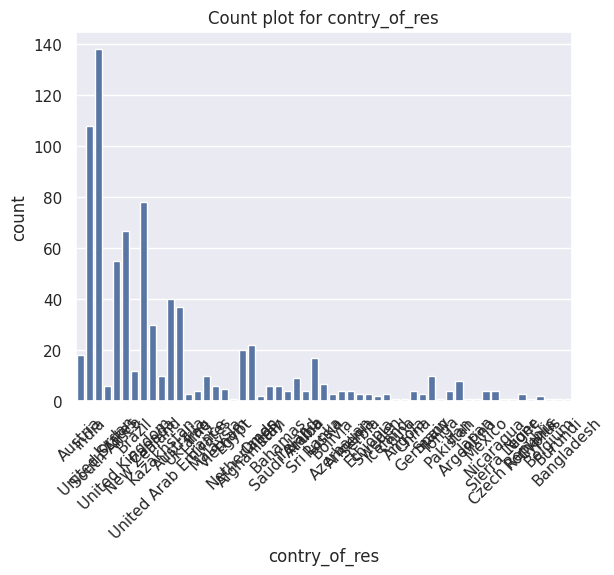

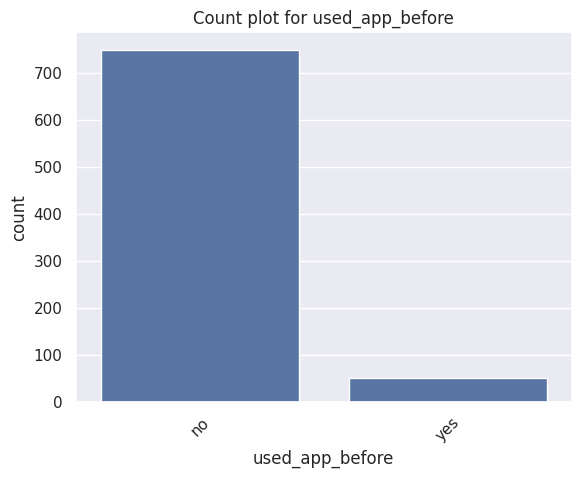

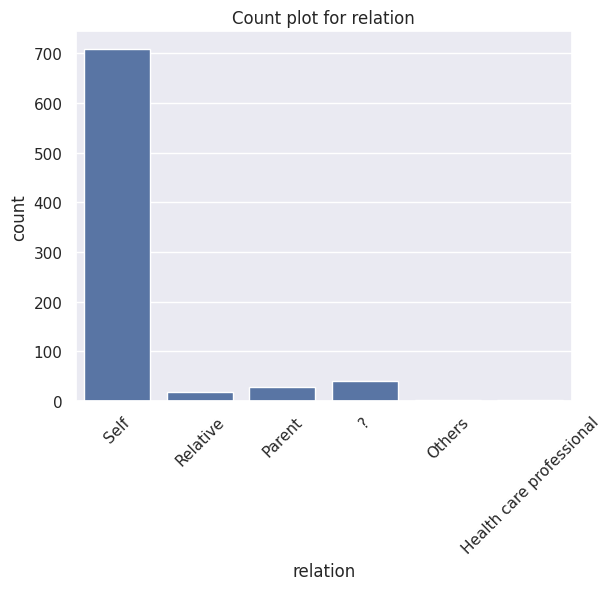

In [ ]:
cat_col=[
    'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before' ,
    'relation']
for col in cat_col:
  sns.countplot(x=data[col])
  plt.title(f"Count plot for {col}")
  plt.xlabel(col)
  plt.ylabel("count")
  plt.xticks(rotation=45)
  plt.show()

In [ ]:
data["Class/ASD"].value_counts()

,count
Class/ASD,
0,639
1,161


In [ ]:
# handling missing values in ethinicity and relation
data["ethnicity"] = data["ethnicity"].replace({"?": "Others", "Others":"Others"})

In [ ]:
data["ethnicity"].unique()

array(['Others', 'White-European', 'Middle Eastern ', 'Pasifika', 'Black',
       'Hispanic', 'Asian', 'Turkish', 'South Asian', 'Latino', 'others'],
      dtype=object)

In [ ]:
data["relation"] = data["relation"].replace({"?": "Others", "Relative":"Others","Parent":"Others","Health care professional":"Others" })

In [ ]:
data["relation"].unique()

array(['Self', 'Others'], dtype=object)

In [ ]:
data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,Others,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,Others,no,no,India,no,2.255185,Self,0
2,1,1,1,1,1,1,1,1,1,1,7,m,White-European,no,yes,United States,no,14.851484,Self,1
3,0,0,0,0,0,0,0,0,0,0,23,f,Others,no,no,United States,no,2.276617,Self,0
4,0,0,0,0,0,0,0,0,0,0,43,m,Others,no,no,South Africa,no,-4.777286,Self,0


In [ ]:
#label encoding : extracting data type object columns
object_columns = data.select_dtypes(include=["object"]).columns


In [ ]:
object_columns

Index(['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'relation'],
      dtype='object')

In [ ]:
encoder={}
for column in object_columns:   # apply labl encoder to store encoders
  label_encoder = LabelEncoder()
  data[column]= label_encoder.fit_transform(data[column])
  encoder[column] = label_encoder # save for this column

  with open("encoders.pkl","wb") as f:  # save encoders as pickle file
    pickle.dump(encoder,f)

In [ ]:
encoder

{'gender': LabelEncoder(),
 'ethnicity': LabelEncoder(),
 'jaundice': LabelEncoder(),
 'austim': LabelEncoder(),
 'contry_of_res': LabelEncoder(),
 'used_app_before': LabelEncoder(),
 'relation': LabelEncoder()}

In [ ]:
data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,0,5,0,0,7,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,47,1,5,0,0,24,0,2.255185,1,0
2,1,1,1,1,1,1,1,1,1,1,7,1,9,0,1,53,0,14.851484,1,1
3,0,0,0,0,0,0,0,0,0,0,23,0,5,0,0,53,0,2.276617,1,0
4,0,0,0,0,0,0,0,0,0,0,43,1,5,0,0,45,0,-4.777286,1,0


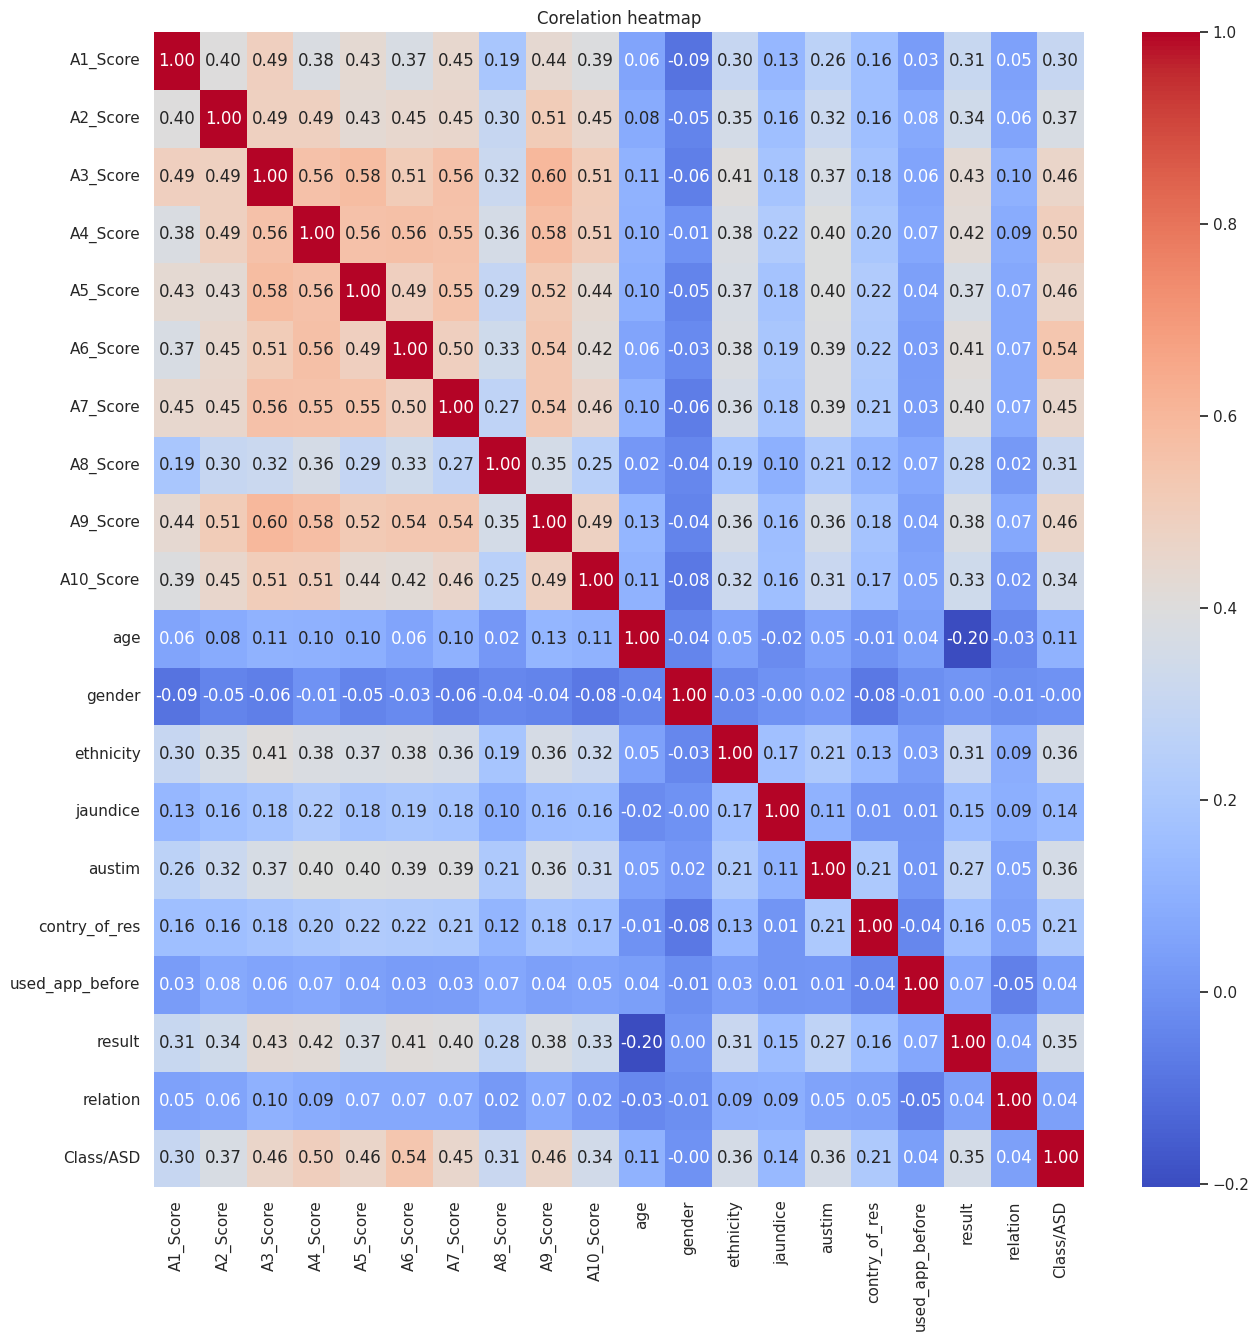

In [ ]:
# determining corelation matrix
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True,cmap="coolwarm",fmt=".2f")
plt.title("Corelation heatmap")
plt.show()

In [ ]:
#data preprocessing
data.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
count,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,27.963750,0.662500,5.596250,0.231250,0.16375,33.538750,0.062500,8.537303,0.886250,0.201250
std,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.329827,0.473153,2.914851,0.421896,0.37028,16.331546,0.242213,4.807676,0.317706,0.401185
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,-6.137748,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,4.000000,0.000000,0.00000,24.000000,0.000000,5.306575,1.000000,0.000000
50%,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.000000,1.000000,5.000000,0.000000,0.00000,34.000000,0.000000,9.605299,1.000000,0.000000
75%,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.250000,1.000000,9.000000,0.000000,0.00000,52.000000,0.000000,12.514484,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.000000,1.000000,10.000000,1.000000,1.00000,54.000000,1.000000,15.853126,1.000000,1.000000


In [ ]:
#replace outliers with mean/median
def replace_outlier(data,column):
  Q1=data["age"].quantile(0.25)
  Q3=data["age"].quantile(0.75)
  IQR = Q3-Q1
  lower_bound = Q1 - 1.5 *IQR
  upper_bound = Q3 + 1.5 *IQR
  median = data[column].median()

  data[column] = data[column].apply(lambda x: median if x < lower_bound or x > upper_bound else x)
  return data

In [ ]:
data=replace_outlier(data,"age")
data= replace_outlier(data,"result")


In [ ]:
data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38.0,0,5,0,0,7,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,47.0,1,5,0,0,24,0,2.255185,1,0
2,1,1,1,1,1,1,1,1,1,1,7.0,1,9,0,1,53,0,14.851484,1,1
3,0,0,0,0,0,0,0,0,0,0,23.0,0,5,0,0,53,0,2.276617,1,0
4,0,0,0,0,0,0,0,0,0,0,43.0,1,5,0,0,45,0,-4.777286,1,0


In [ ]:
#train test split
X = data.drop(columns=["Class/ASD"])
Y = data["Class/ASD"]


In [ ]:
print(X)


     A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0           1         0         1         0         1         0         1   
1           0         0         0         0         0         0         0   
2           1         1         1         1         1         1         1   
3           0         0         0         0         0         0         0   
4           0         0         0         0         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
795         0         1         0         0         0         0         0   
796         0         1         1         0         0         1         0   
797         0         0         0         0         0         0         0   
798         0         0         0         0         0         0         0   
799         0         1         0         0         0         0         0   

     A8_Score  A9_Score  A10_Score   age  gender  ethnicity  jaundice  aust

In [ ]:
print(Y)

0      0
1      0
2      1
3      0
4      0
      ..
795    0
796    0
797    0
798    0
799    0
Name: Class/ASD, Length: 800, dtype: int64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [ ]:
print(Y_train.shape, Y_test.shape)

(640,) (160,)


In [ ]:
Y_train.value_counts()

,count
Class/ASD,
0,515
1,125


In [ ]:
Y_test.value_counts()

,count
Class/ASD,
0,124
1,36


In [ ]:
#Sythentic Minority Oversappling technique
smote = SMOTE(random_state=42) # applying smote for removing inconsistency in trainig data
X_train_smote, Y_train_smote = smote.fit_resample(X_train, Y_train)

In [ ]:
print(Y_train_smote.value_counts())

Class/ASD
1    515
0    515
Name: count, dtype: int64


In [ ]:
#training
models={
    " Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Hist_grad_boost_classifier": HistGradientBoostingClassifier(random_state=42)
}



In [ ]:
models

{' Decision Tree': DecisionTreeClassifier(random_state=42),
 'Random Forest': RandomForestClassifier(random_state=42),
 'Hist_grad_boost_classifier': HistGradientBoostingClassifier(random_state=42)}

In [ ]:
#dict to store cross val score
cv_scores={}
#perform 5- fold cv
for model_name, model in models.items():
  print(f"Training{model_name} with default parameters :")
  scores = cross_val_score(model, X_train_smote, Y_train_smote ,cv=5 , scoring="accuracy")
  cv_scores[model_name] = scores
  print(f"{model_name} cross val accuracy:{np.mean(scores):.2f} ")
  print("-"*50)

Training Decision Tree with default parameters :
 Decision Tree cross val accuracy:0.86 
--------------------------------------------------
TrainingRandom Forest with default parameters :
Random Forest cross val accuracy:0.92 
--------------------------------------------------
TrainingHist_grad_boost_classifier with default parameters :
Hist_grad_boost_classifier cross val accuracy:0.90 
--------------------------------------------------


In [ ]:
cv_scores

{' Decision Tree': array([0.7961165 , 0.87864078, 0.87378641, 0.8592233 , 0.87378641]),
 'Random Forest': array([0.90776699, 0.91747573, 0.91747573, 0.91747573, 0.9223301 ]),
 'Hist_grad_boost_classifier': array([0.8592233 , 0.93203883, 0.91262136, 0.89320388, 0.9223301 ])}

In [ ]:
#Inference: Random forest gives best accuracy
#hyperparameter tuning
decision_tree = DecisionTreeClassifier(random_state=42) # initializing
random_forest = RandomForestClassifier(random_state=42) # initializing
hist_grad_boost_classifier= HistGradientBoostingClassifier(random_state=42) # initializing

In [ ]:
param_grid_dt={                             # hyperparameter grids for randomized search cv
    "criterion":["gini","entropy"],
    "max_depth":[None,10,20,30,50,70],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,4],
}


param_grid_rf={
    "n_estimators":[100,200,500],
    "max_depth":[None,10,20,30],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,4],
    "bootstrap":[True,False]
}

param_grid_hgbc={
    "max_iter": [100,200,500],
    "learning_rate": [0.01,0.1,0.2,0.3],
    "max_depth":[3,5,7,10],
    "max_leaf_nodes":[None,10,20,30],
}



In [ ]:
#hyperparameter for trees
#perform randmized search cv
random_search_dt = RandomizedSearchCV(estimator=decision_tree, param_distributions=param_grid_dt, n_iter=20, cv=5, scoring="accuracy", random_state=42)
random_search_rf = RandomizedSearchCV(estimator=random_forest, param_distributions=param_grid_rf, n_iter=20, cv=5, scoring="accuracy", random_state=42)
random_search_hgbc = RandomizedSearchCV(estimator=hist_grad_boost_classifier, param_distributions=param_grid_hgbc, n_iter=20, cv=5, scoring="accuracy", random_state=42)

In [ ]:
random_search_dt.fit(X_train_smote, Y_train_smote)
random_search_rf.fit(X_train_smote, Y_train_smote)
random_search_hgbc.fit(X_train_smote, Y_train_smote)

RandomizedSearchCV(cv=5,
                   estimator=HistGradientBoostingClassifier(random_state=42),
                   n_iter=20,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 5, 7, 10],
                                        'max_iter': [100, 200, 500],
                                        'max_leaf_nodes': [None, 10, 20, 30]},
                   random_state=42, scoring='accuracy')

In [ ]:
# best model with best score
best_model = None
best_score = 0
if random_search_dt.best_score_ > best_score:
  best_score = random_search_dt.best_score_
  best_model = random_search_dt.best_estimator_

if random_search_rf.best_score_ > best_score:
  best_score = random_search_rf.best_score_
  best_model = random_search_rf.best_estimator_

if random_search_hgbc.best_score_ > best_score:
  best_score = random_search_hgbc.best_score_
  best_model = random_search_hgbc.best_estimator_



In [ ]:
print(f"Best Model: {best_model}")
print(f"Best Cross val accuracy: {best_score:.2f}")

Best Model: RandomForestClassifier(bootstrap=False, max_depth=30, n_estimators=200,
                       random_state=42)
Best Cross val accuracy: 0.93


In [ ]:
with open("best_model.pkl","wb") as f:
  pickle.dump(best_model,f)

In [ ]:
# evaluate on test data

In [ ]:
Y_test_pred = best_model.predict(X_test)
print("Accuracy score:\n",accuracy_score(Y_test, Y_test_pred))
print("Confusion matrix:\n",confusion_matrix(Y_test, Y_test_pred))
print("Classification Report:\n",classification_report(Y_test, Y_test_pred))


Accuracy score:
 0.8125
Confusion matrix:
 [[109  15]
 [ 15  21]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88       124
           1       0.58      0.58      0.58        36

    accuracy                           0.81       160
   macro avg       0.73      0.73      0.73       160
weighted avg       0.81      0.81      0.81       160



In [ ]:
# to do:
#build predictive sys with encoders and model file
# see if you could improve the performance
#